In [1]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [6]:
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans 

In [8]:
import pandas as pd
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)
def load_data_demo(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_demog.csv")
    return pd.read_csv(csv_path)

In [3]:
# Cargar DataFrame
df = load_data_prep()
df_dem = load_data_demo()

In [4]:
df.shape

(96, 437)

       count       mean       std       min       25%       50%        75%   
grupo                                                                        
0       30.0  23.187320  3.708616   7.96909  22.19280  24.46730  25.395775  \
1       66.0  29.471889  1.423227  26.72970  28.17515  29.63355  30.356275   

           max  
grupo           
0      26.0740  
1      32.8997  


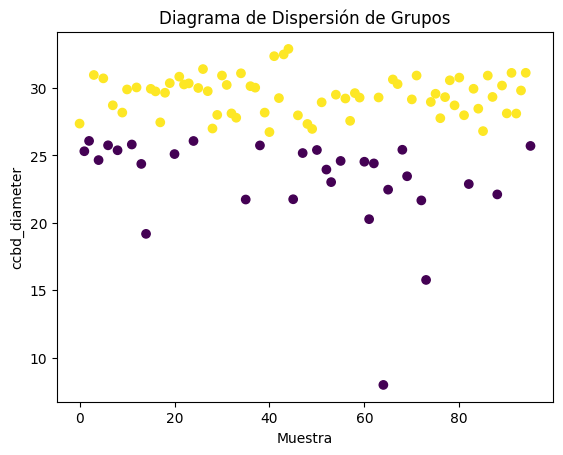

In [7]:
# Seleccionar la columna de interés
column_name = "ccbd_diameter"

num_rows = 49  # Cambia esto al número deseado de filas

# Tomar un subconjunto de filas del DataFrame
subset_data = df.head(num_rows)


# Preparar los datos para el clustering
X = df[[column_name]].values

# Determinar el número de clusters (grupos) deseado
num_clusters = 2

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['grupo'] = kmeans.fit_predict(X)

# Agregar la columna "k_means_group" al DataFrame
df['k_means_group'] = kmeans.labels_

# Mostrar información sobre los grupos
group_summary = df.groupby('grupo')[column_name].describe()
print(group_summary)

# Visualizar los grupos en un diagrama de dispersión
plt.scatter(df.index, df[column_name], c=df['grupo'], cmap='viridis')
plt.xlabel('Muestra')
plt.ylabel(column_name)
plt.title('Diagrama de Dispersión de Grupos')
plt.show()